This Notebook was created by Pablo Salazar

This notebook was used to create a Data Frame in Python from the data dowloaded from Wikipedia website "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

Since, I was having issues to read the data from Wikipedia, I decided to download the data as a ".csv" file Then the data was pre-processed before uploading it in Python to create the Data Frame

Once the data was ready I used pandas to create the data frame in Python

In [3]:
import csv
import numpy as np
import pandas as pd

In [4]:
csv="C:\Post_Code_Data.csv"
df = pd.read_csv(csv)

In [5]:
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regents Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [6]:
df.tail()

,Postcode,Borough,Neighbourhood
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern
101,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So..."
102,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen..."


In [7]:
df.shape

(103, 3)

In the Data Frame I have a total of 103 lines, means 103 different post codes, and 3 columns

Then I dowloaded the "csv" file available with the Geospatial Coordinates

I did some pre-processing of the data and then used pandas to make the new data frame including Latitude and Longitude to the different Postal Code areas

In [8]:
import csv
import numpy as np
import pandas as pd
csv2="C:\Post_Code_Data_Lat_Long.csv"
df2 = pd.read_csv(csv2)

In [9]:
df2.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regents Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [10]:
df2.tail()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
101,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509
102,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen...",43.628841,-79.520999


In [11]:
df2.shape

(103, 5)

Now I have the same 103 lines corresponding to different post codes and 2 additional columns (Latitude and Longitude)

In [48]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [49]:
df3=df2.drop('Neighbourhood', axis=1)
df3.head()

,Postcode,Borough,Latitude,Longitude
0,M3A,North York,43.753259,-79.329656
1,M4A,North York,43.725882,-79.315572
2,M5A,Downtown Toronto,43.654260,-79.360636
3,M6A,North York,43.718518,-79.464763
4,M7A,Queen's Park,43.662301,-79.389494


In [50]:
df3=df3.drop('Borough', axis=1)
df3.head()

,Postcode,Latitude,Longitude
0,M3A,43.753259,-79.329656
1,M4A,43.725882,-79.315572
2,M5A,43.654260,-79.360636
3,M6A,43.718518,-79.464763
4,M7A,43.662301,-79.389494


In [18]:
X=df3.values[:,1:]
X=np.nan_to_num(X)
cluster=StandardScaler().fit_transform(X)
cluster

array([[ 0.93187104,  0.69818881],
       [ 0.40749844,  0.84388426],
       [-0.96437519,  0.37773518],
       [ 0.26644077, -0.6993678 ],
       [-0.81034434,  0.07922652],
       [-0.7039597 , -1.39737754],
       [ 1.95523876,  2.09777597],
       [ 0.79103364,  0.465121  ],
       [ 0.03427589,  0.90216906],
       [-0.90879146,  0.18842596],
       [ 0.09518258, -0.49568547],
       [-1.0279041 , -1.62993333],
       [ 1.53094905,  2.44798852],
       [ 0.40783172,  0.58164715],
       [-0.17744183,  0.81474393],
       [-1.01735586,  0.22482887],
       [-0.20737226, -0.32106485],
       [-1.1701819 , -1.86243118],
       [ 1.12942801,  2.15613628],
       [-0.54111407,  1.07704414],
       [-1.14613182,  0.24667041],
       [-0.29846415, -0.58298336],
       [ 1.271543  ,  1.86437197],
       [ 0.0852875 ,  0.3486083 ],
       [-0.89364811,  0.10106496],
       [-0.67165797, -0.26285143],
       [ 1.3126078 ,  1.6310228 ],
       [ 1.89922981,  0.3486083 ],
       [ 0.95236034,

In [51]:
num_clusters=4
k_means=KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster)
labels=k_means.labels_
print(labels)

[0 0 3 2 3 1 0 0 3 3 2 1 0 0 3 3 3 1 0 3 3 3 0 3 3 3 0 0 2 3 3 3 0 0 2 3 3
 3 0 2 2 3 3 3 0 2 2 3 3 2 2 0 2 2 3 2 1 2 3 2 2 2 2 1 2 0 2 3 3 1 1 0 2 2
 3 1 1 1 0 3 3 1 0 3 3 0 3 3 1 2 0 3 3 1 1 0 3 3 1 3 3 1 1]


In [52]:
df3["Labels"]= labels
df3.head()

,Postcode,Latitude,Longitude,Labels
0,M3A,43.753259,-79.329656,0
1,M4A,43.725882,-79.315572,0
2,M5A,43.654260,-79.360636,3
3,M6A,43.718518,-79.464763,2
4,M7A,43.662301,-79.389494,3


In [53]:
df3.groupby('Labels').mean()

,Latitude,Longitude
Labels,,
0,43.766657,-79.273543
1,43.655559,-79.523593
2,43.742853,-79.459731
3,43.670195,-79.375949


In [54]:
k_means_centers=k_means.cluster_centers_
k_means_centers

array([[ 1.18851287,  1.27863113],
       [-0.9394901 , -1.30790562],
       [ 0.73256303, -0.64730861],
       [-0.65914393,  0.21933192]])

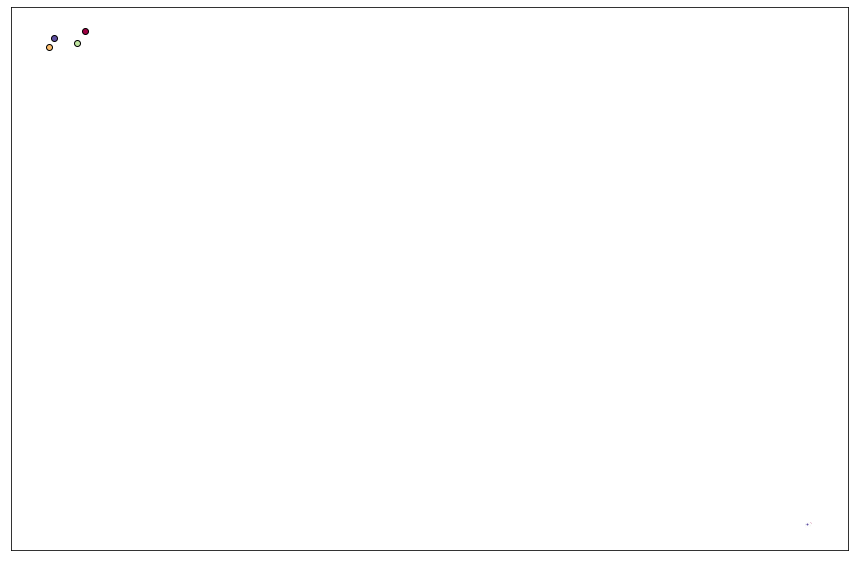

In [55]:
fig=plt.figure(figsize=(15,10))
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
ax=fig.add_subplot(1,1,1)
for k, col in zip(range(len([[4,4], [-2,-1],[2,-3],[1,1]])), colors):
    my_members=(labels == k)
    cluster_center=k_means_centers[k]
    ax.plot(X[my_members,0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_xticks(())
ax.set_yticks(())

plt.show()
plt.show()

In [56]:
df3.head(10)

,Postcode,Latitude,Longitude,Labels
0,M3A,43.753259,-79.329656,0
1,M4A,43.725882,-79.315572,0
2,M5A,43.654260,-79.360636,3
3,M6A,43.718518,-79.464763,2
4,M7A,43.662301,-79.389494,3
5,M9A,43.667856,-79.532242,1
6,M1B,43.806686,-79.194353,0
7,M3B,43.745906,-79.352188,0
8,M4B,43.706397,-79.309937,3
9,M5B,43.657162,-79.378937,3
